<center><h1>Univariate Descriptive Statistics</center></h1>
***

Here, we will try to analyze each of the columns of our raw dataset, you can count this notebook as separate notebook, or maybe preliminary notebook before **Exlporitary-Descriptive-Analysis**. This will be rather long notebook, giving us interesting information about dataset. 
Because the dataset is raw, it has some flaws which, I took care of in next cell

In [2]:
import set_jupyter_path
from src.car_price_prediction.utils import dataset_manager
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = dataset_manager.get_raw_dataset()
data["Пробег"] = data["Пробег"].replace(to_replace = "", value = np.NaN)

Here, is a whole summary of quantitive features of dataset, from which most of all doesn't make any sense, we will try to analyze another way

In [3]:
data.describe()

,Год выпуска,Мощность,Объём,Пробег,Цена
count,13663.000000,1.100300e+04,1.339400e+04,9.704000e+03,1.385900e+04
mean,2005.571324,1.009826e+12,6.266299e+04,1.902248e+15,7.403754e+04
std,7.039562,1.059258e+14,6.149507e+06,1.324058e+17,6.568532e+06
min,1961.000000,1.000000e+00,-2.500000e+00,1.000000e+00,0.000000e+00
25%,2002.000000,1.350000e+02,2.000000e+00,4.610725e+04,4.000000e+03
50%,2005.000000,1.730000e+02,2.400000e+00,1.115680e+05,8.300000e+03
75%,2012.000000,2.490000e+02,3.200000e+00,1.750000e+05,1.867650e+04
max,2018.000000,1.111111e+16,7.054355e+08,9.223372e+18,7.731526e+08


Below we will see the histogram of cars under the sale and their milage. I needed to exclude the mileages that are more than 1,000,000 km because, they are rarely so, and there are extreme values like 10e+19 km which are not possible even for spacecrafts like 'Voyager' to have. So, the plot looks like having positive skeweness. 

Text(0,0.5,'Number of cars under the sale')

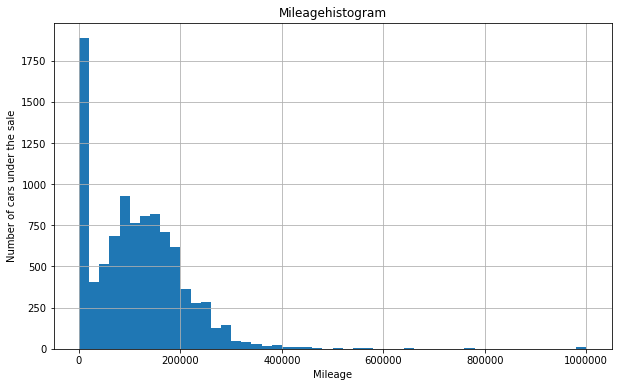

In [11]:
car_mileage = data["Пробег"]
fig = plt.figure(figsize = (10,6))
ax = fig.gca()

car_mileage[car_mileage<1000000].hist(bins=50)
plt.title("Mileagehistogram")
plt.xlabel("Mileage")
plt.ylabel("Number of cars under the sale")

Below, we will see histogram of number of cars under the sale in different year, the shape of data is negatively skewed, and to find center and spread it's better to use median and interquartile range of data, and in the end we can see five-number summary of data.

Text(0,0.5,'Number of cars under the sale')

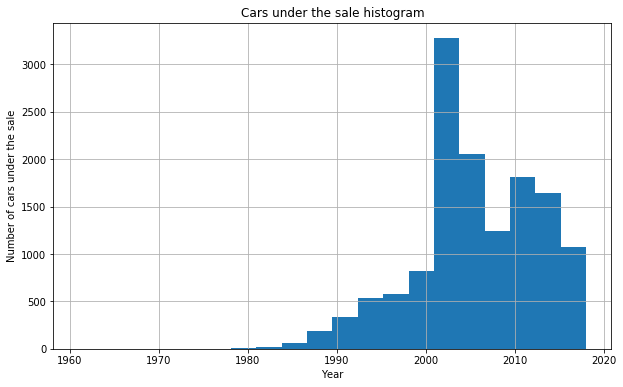

In [13]:
car_year = data["Год выпуска"]
fig = plt.figure(figsize = (10,6))
ax = fig.gca()
car_year.hist(bins = 20,ax = ax)
plt.title("Cars under the sale histogram")
plt.xlabel("Year")
plt.ylabel("Number of cars under the sale")


The center(median) of car year is 2005 year. More sense will make mode of the car. Mode of the car is 2003, so it means, the cars of year 2003 is the majority of selling cars on the market. Also that 50% of the cars under saleare in range betweem 2012 and 2002.

In [6]:
car_year.median()

2005.0

In [7]:
car_year.mode()

0    2003.0
dtype: float64

In [8]:
print(car_year.quantile(q=0.75))
print(car_year.quantile(q=0.25))
print(car_year.quantile(q=0.75)-car_year.quantile(q=0.25))

2012.0
2002.0
10.0
